<a href="https://colab.research.google.com/github/cbrown2024/Streamlit-2025/blob/main/Copy_of_Multiple_Regression_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
carsData = pd.read_csv('cars.csv')

In [ ]:
carsData.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
carsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
numeric_cols = ['Dimensions.Height', 'Dimensions.Length', 'Dimensions.Width',
       'Engine Information.Number of Forward Gears', 'Fuel Information.City mpg',
       'Fuel Information.Highway mpg', 'Engine Information.Engine Statistics.Horsepower',
       'Engine Information.Engine Statistics.Torque']
#sns.heatmap(data=carsData[numeric_cols].corr(),
# annot=True, cmap='Blues', vmin=-1.0, vmax=1.0, cbar=False, fmt='.2f')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    carsData[['Engine Information.Engine Statistics.Horsepower']], carsData[['Fuel Information.City mpg']],
    test_size=0.20, random_state=20)
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test,y_test)  # comments below are not required to be put in your notebook
  # score returns the R^2 value of the prediction
  # 1.0 is perfect fit, values closer to 1.0 are a better fit
  # 0.0 means model is no better than predicting the mean of the dependent variable
  #   which means that the input features don't help in the prediction

KeyError: "None of [Index(['Engine Information.Engine Statistics.Horsepower'], dtype='object')] are in the [columns]"

In [ ]:
model.score(x_train, y_train)
  # how does this score compare to the test data R^2 value?  What does it mean?
  # we don't want this to be too high, this indicates "overfitting" of the data.

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Dimensions.Height
- Dimensions.Length
- Dimensions.Width
- Engine Information.Driveline_All-wheel drive
- Engine Information.Driveline_Four-wheel drive
- ...


In [ ]:
y_predicted = model.predict(x_test)
   # this takes the test data, puts it through the model and predicts the labels

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Dimensions.Height
- Dimensions.Length
- Dimensions.Width
- Engine Information.Driveline_All-wheel drive
- Engine Information.Driveline_Four-wheel drive
- ...


In [ ]:
# create DataFrame for the price predictions
predicted = pd.DataFrame(y_predicted, columns=['predictedCityMpg']) # Changed column name to reflect what is being predicted
# combine the test data and the predicted data into a dataframe
final = predicted.join([x_test.reset_index(drop=True),
                        y_test.reset_index(drop=True)])
# Display the actual city mpg and the model's predicted city mpg
display(final[['Engine Information.Engine Statistics.Horsepower','Fuel Information.City mpg','predictedCityMpg']].head())

# this code above shows the actual price and model's predicted price
# we can use this to calculate the error (also called residuals) of the model

,Engine Information.Engine Statistics.Horsepower,Fuel Information.City mpg,predictedCityMpg
0,330,19,0.072959
1,403,13,-0.810904
2,110,28,1.759138
3,158,22,1.192108
4,140,29,1.807179


In [ ]:
final['residual'] = final['Fuel Information.City mpg'] - final.predictedCityMpg
display(final.head(2))
# here we calculate the error/residual, which is
# the difference between actual and predicted price.

,predictedCityMpg,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque,Fuel Information.City mpg,residual
0,0.072959,330,273,19,18.927041
1,-0.810904,403,417,13,13.810904


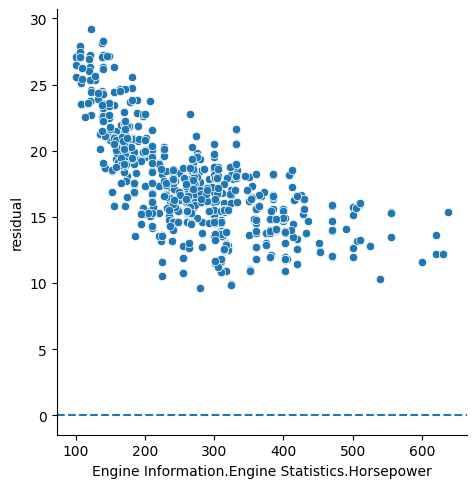

In [ ]:
g = sns.relplot(data=final, x='Engine Information.Engine Statistics.Horsepower', y='residual', kind='scatter')
for ax in g.axes.flat:
    ax.axhline(0, ls='--')
# here we plot the residuals to visualize the prediction error

<Axes: xlabel='residual', ylabel='Density'>

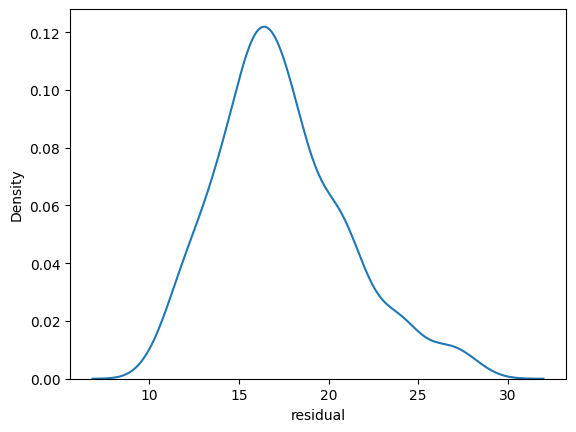

In [ ]:
sns.kdeplot(data=final, x='residual')
# a KDE plot will show the frequency/density of
# the residuals to see what the typical model error

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    carsData[['Engine Information.Engine Statistics.Horsepower', 'Engine Information.Engine Statistics.Torque']],
    carsData[['Fuel Information.City mpg']], test_size=0.20, random_state=20)

KeyError: "None of [Index(['Engine Information.Engine Statistics.Horsepower', 'Engine Information.Engine Statistics.Torque'], dtype='object')] are in the [columns]"

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)  # model is now the trained model after fit()

LinearRegression()

In [ ]:
model.score(x_test, y_test)  # shows R^2 of new model using test data

y_predicted = model.predict(x_test)
# uses the test data through the newly trained model to predict the price

In [ ]:
y_predicted = model.predict(x_test)
# uses the test data through the newly trained model to predict the price

In [ ]:
# create the DataFrame for the price predictions
predicted = pd.DataFrame(y_predicted, columns=['predictedCityMpg'])

# combine the test data and the predicted data into a DataFrame
final = predicted.join([x_test.reset_index(drop=True),
                        y_test.reset_index(drop=True)])
display(final.head()[['Engine Information.Engine Statistics.Horsepower','Engine Information.Engine Statistics.Torque','Fuel Information.City mpg','predictedCityMpg']])
# shows dataframe with price & predictedPrice in test dataset

,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque,Fuel Information.City mpg,predictedCityMpg
0,330,273,19,17.341620
1,403,417,13,12.403888
2,110,106,28,22.822927
3,158,162,22,20.938212
4,140,128,29,22.102682


,predictedCityMpg,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque,Fuel Information.City mpg,residual
0,17.341620,330,273,19,1.658380
1,12.403888,403,417,13,0.596112


<Axes: xlabel='residual', ylabel='Density'>

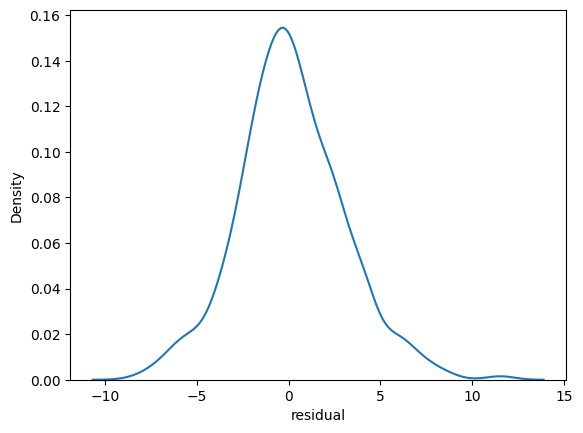

In [ ]:
final['residual'] = final['Fuel Information.City mpg'] - final.predictedCityMpg
display(final.head(2))
# create the residual column, which is the difference
# between actual and predicted

sns.kdeplot(data=final, x='residual')
# kde plot the residuals

In [ ]:
carsData.nunique()

,0
car_ID,205
symboling,6
CarName,147
fueltype,2
aspiration,2
doornumber,2
carbody,5
drivewheel,3
enginelocation,2
wheelbase,53


In [ ]:
carsData.fuelinformation.fueltype

AttributeError: 'DataFrame' object has no attribute 'fuelinformation'

In [ ]:
catColumns = ['Engine Information.Driveline', 'Engine Information.Transmission', 'Fuel Information.Fuel Type', 'Identification.Classification']
dummies = pd.get_dummies(carsData[catColumns])
dummies.info()

KeyError: "None of [Index(['Engine Information.Driveline', 'Engine Information.Transmission',\n       'Fuel Information.Fuel Type', 'Identification.Classification'],\n      dtype='object')] are in the [columns]"

In [ ]:
carsDummies = carsData.drop(columns=catColumns)
carsDummies = carsDummies.join(dummies)
carsDummies.info()

KeyError: "['Engine Information.Driveline', 'Engine Information.Transmission', 'Fuel Information.Fuel Type', 'Identification.Classification'] not found in axis"

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numCols = ['Dimensions.Height', 'Dimensions.Length', 'Dimensions.Width',
       'Engine Information.Number of Forward Gears', 'Fuel Information.City mpg',
       'Fuel Information.Highway mpg', 'Engine Information.Engine Statistics.Horsepower',
       'Engine Information.Engine Statistics.Torque']
carsDummies[numCols] = scaler.fit_transform(carsDummies[numCols])
carsDummies.head()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Fuel Information.City mpg,Fuel Information.Highway mpg,Identification.ID,Identification.Make,...,Engine Information.Transmission_6 Speed Manual,Engine Information.Transmission_7 Speed Automatic,Engine Information.Transmission_7 Speed Automatic Select Shift,Engine Information.Transmission_8 Speed Automatic Select Shift,Fuel Information.Fuel Type_Compressed natural gas,Fuel Information.Fuel Type_Diesel fuel,Fuel Information.Fuel Type_E85,Fuel Information.Fuel Type_Gasoline,Identification.Classification_Automatic transmission,Identification.Classification_Manual transmission
0,-0.090668,0.196174,0.725588,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,0.568728,0.161685,0.134796,2009 Audi A3 3.2,Audi,...,False,False,False,False,False,False,False,True,True,False
1,-0.090668,0.196174,0.725588,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,0.568728,1.054732,0.597212,2009 Audi A3 2.0 T AT,Audi,...,False,False,False,False,False,False,False,True,True,False
2,-0.090668,0.196174,0.725588,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,0.568728,0.831470,0.905490,2009 Audi A3 2.0 T,Audi,...,True,False,False,False,False,False,False,True,False,True
3,-0.090668,0.196174,0.725588,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,0.568728,0.831470,0.597212,2009 Audi A3 2.0 T Quattro,Audi,...,False,False,False,False,False,False,False,True,True,False
4,-0.090668,0.196174,0.725588,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,0.568728,0.831470,0.597212,2009 Audi A3 2.0 T Quattro,Audi,...,False,False,False,False,False,False,False,True,True,False


In [ ]:
carsTrain, carsTest = train_test_split(carsDummies, test_size=0.2,
    random_state=20)

In [ ]:
model = LinearRegression()
# Define the feature columns (all columns except the target variable)
xCols = [col for col in carsTrain.columns if col != 'Fuel Information.City mpg' and col != 'Engine Information.Engine Type' and col != 'Identification.ID' and col != 'Identification.Make' and col != 'Identification.Model Year']
model.fit(carsTrain[xCols], carsTrain['Fuel Information.City mpg'])

LinearRegression()

In [ ]:
model.score(carsTest[xCols], carsTest['Fuel Information.City mpg'])

0.9001238734616478

In [ ]:
model.score(carsTrain[xCols], carsTrain['Fuel Information.City mpg'])

0.8654538228099672

In [ ]:
y_predicted = model.predict(carsTest[xCols])
# Join the predicted price to the original dataframe and view the results
predicted = pd.DataFrame(y_predicted, columns=['predictedCityMpg'])

# Ensure that the indices are aligned before joining
x_test_reset = carsTest[xCols].reset_index(drop=True)
y_test_reset = carsTest['Fuel Information.City mpg'].reset_index(drop=True)

final = predicted.join([x_test_reset, y_test_reset])

# Select a few illustrative feature columns to display along with actual and predicted
# We need to make sure these columns actually exist in x_test_reset (which is now part of final)
illustrative_cols = ['Engine Information.Engine Statistics.Horsepower', 'Engine Information.Engine Statistics.Torque',
                     'Fuel Information.Highway mpg', 'Engine Information.Driveline_All-wheel drive',
                     'Identification.Classification_Automatic transmission']

# Ensure the illustrative_cols are actually in final's columns before trying to display
cols_to_display = [col for col in illustrative_cols if col in final.columns]
cols_to_display.extend(['Fuel Information.City mpg', 'predictedCityMpg'])


display(final[cols_to_display].head())

,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque,Fuel Information.Highway mpg,Engine Information.Driveline_All-wheel drive,Identification.Classification_Automatic transmission,Fuel Information.City mpg,predictedCityMpg
0,0.624454,0.002924,0.443074,False,False,0.384947,0.072959
1,1.390584,1.441292,-0.635899,True,True,-0.954625,-0.810904
2,-1.684429,-1.665183,1.522046,False,False,2.394304,1.759138
3,-1.180673,-1.105818,0.597212,False,False,1.054732,1.192108
4,-1.369582,-1.445432,2.601019,False,True,2.617566,1.807179


<Axes: >

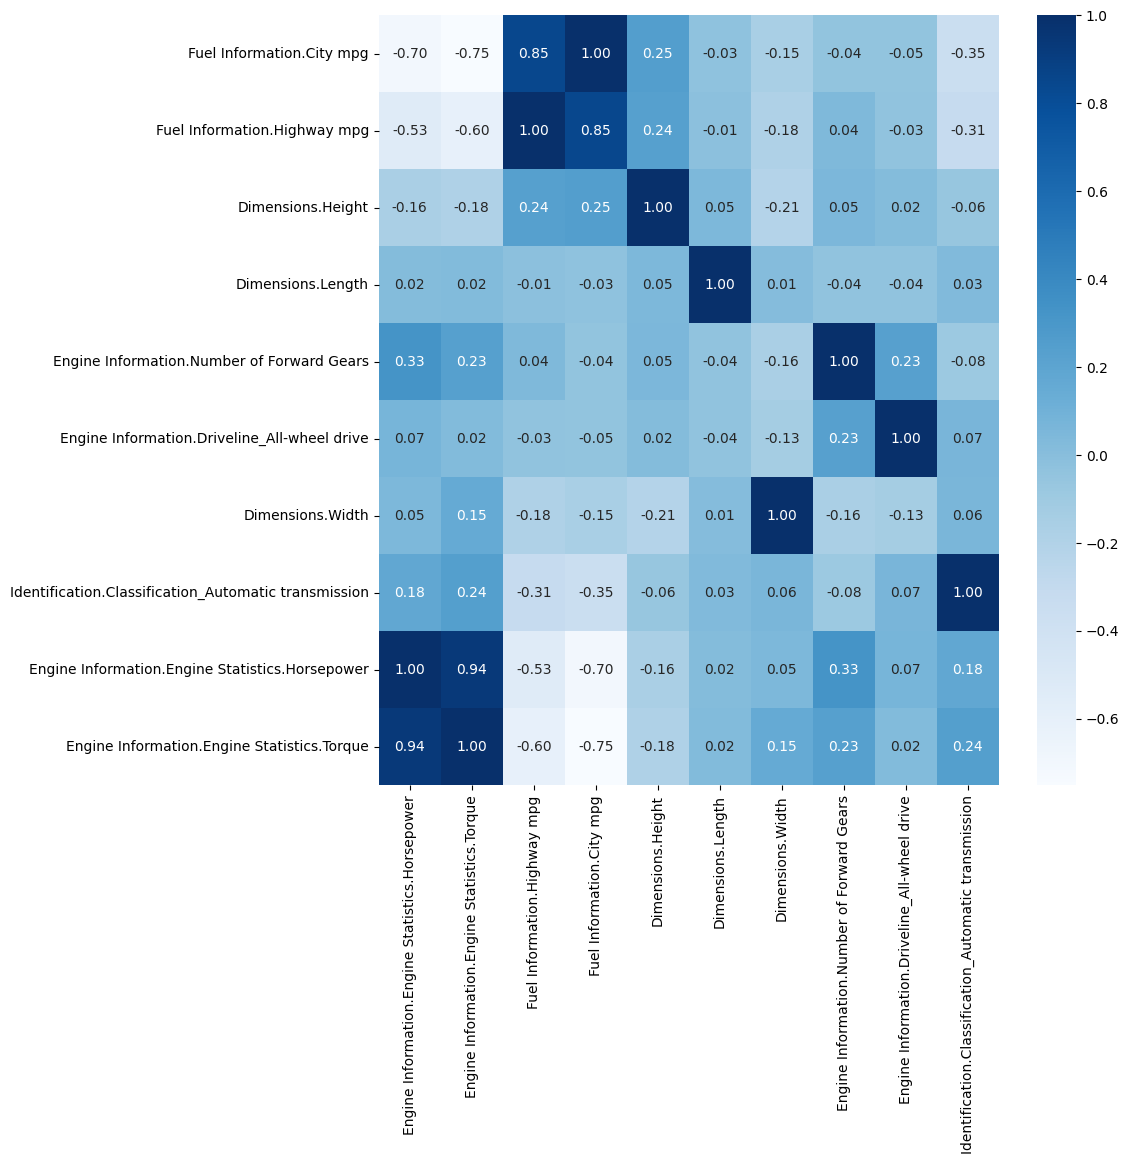

In [ ]:
# use Matplotlib to set the size of the plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))

# Define the columns to include in the heatmap
# Including numerical features, target, and a few illustrative dummy variables
heatmap_cols = ['Engine Information.Engine Statistics.Horsepower',
                'Engine Information.Engine Statistics.Torque',
                'Fuel Information.Highway mpg',
                'Fuel Information.City mpg', # Include the target variable
                'Dimensions.Height', 'Dimensions.Length', 'Dimensions.Width', # Other numerical dimensions
                'Engine Information.Number of Forward Gears', # Number of gears
                'Engine Information.Driveline_All-wheel drive', # Example dummy variable
                'Identification.Classification_Automatic transmission'] # Example dummy variable


# Ensure all selected columns exist in carsTrain before attempting correlation
# Although based on previous steps they should, this adds robustness
existing_heatmap_cols = [col for col in heatmap_cols if col in carsTrain.columns]


# create the heatmap using the existing columns
# Calculate correlation matrix only for the selected columns
correlation_matrix = carsTrain[existing_heatmap_cols].corr()

# Sort the correlation matrix by the target variable's correlation
sorted_correlation = correlation_matrix.sort_values(by='Fuel Information.City mpg', ascending=False)


sns.heatmap(data=sorted_correlation,
                cmap='Blues', annot=True, fmt='.2f')

<Axes: >

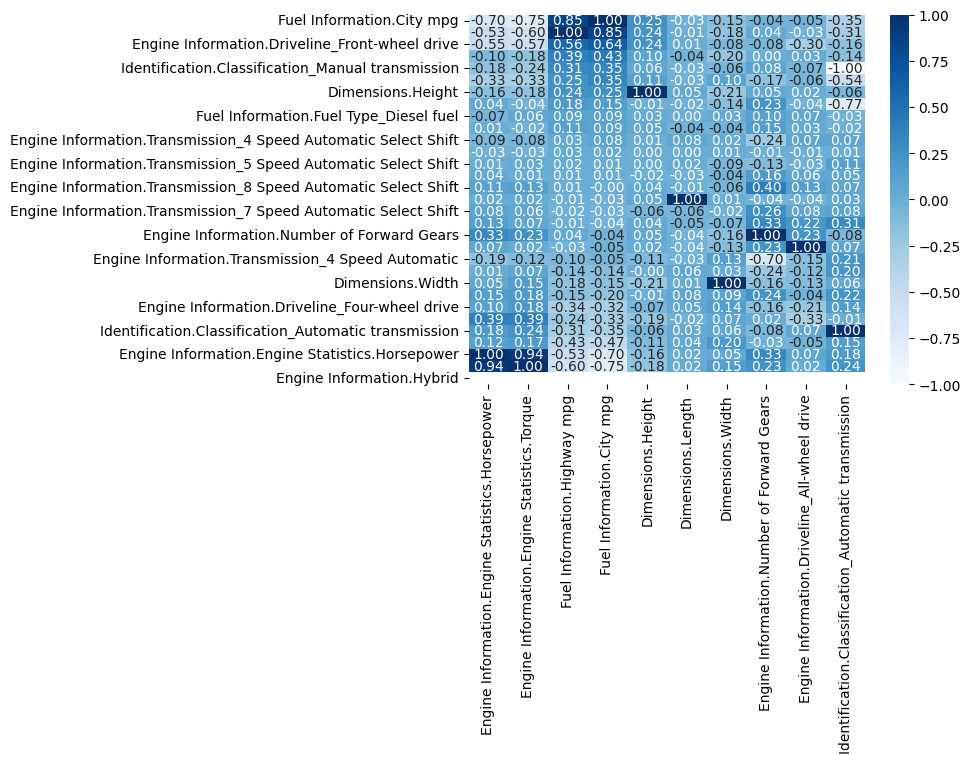

In [ ]:
# Exclude non-numerical columns before calculating correlation
numerical_and_dummy_cols = [col for col in carsTrain.columns if carsTrain[col].dtype != 'object']

correlation_matrix = carsTrain[numerical_and_dummy_cols].corr()

# Define the columns to include in the heatmap, using actual column names
# Including numerical features, target, and a few illustrative dummy variables
heatmap_cols = ['Engine Information.Engine Statistics.Horsepower',
                'Engine Information.Engine Statistics.Torque',
                'Fuel Information.Highway mpg',
                'Fuel Information.City mpg', # Include the target variable
                'Dimensions.Height', 'Dimensions.Length', 'Dimensions.Width', # Other numerical dimensions
                'Engine Information.Number of Forward Gears', # Number of gears
                'Engine Information.Driveline_All-wheel drive', # Example dummy variable
                'Identification.Classification_Automatic transmission'] # Example dummy variable

# Ensure all selected heatmap columns exist in the correlation matrix
existing_heatmap_cols = [col for col in heatmap_cols if col in correlation_matrix.columns]

# Sort the correlation matrix by the target variable's correlation
sorted_correlation = correlation_matrix[existing_heatmap_cols].sort_values(by='Fuel Information.City mpg', ascending=False)

# create the heatmap using the sorted correlation data
sns.heatmap(data=sorted_correlation, cmap='Blues', annot=True, fmt='.2f')

In [ ]:
model = LinearRegression()
xCols = [col for col in carsTrain.columns if col != 'Fuel Information.City mpg' and col != 'Engine Information.Engine Type' and col != 'Identification.ID' and col != 'Identification.Make' and col != 'Identification.Model Year']
model.fit(carsTrain[xCols], carsTrain['Fuel Information.City mpg'])
model.score(carsTest[xCols], carsTest['Fuel Information.City mpg'])

0.9001238734616481

In [ ]:
model.score(carsTrain[xCols], carsTrain['Fuel Information.City mpg'])

0.8654538228099672

In [ ]:
model = LinearRegression()
xCols = [col for col in carsTrain.columns if col != 'Fuel Information.City mpg' and col != 'Engine Information.Engine Type' and col != 'Identification.ID' and col != 'Identification.Make' and col != 'Identification.Model Year']
model.fit(carsTrain[xCols], carsTrain['Fuel Information.City mpg'])
model.score(carsTest[xCols], carsTest['Fuel Information.City mpg'])

0.9001238734616481

In [ ]:
model.score(carsTrain[xCols], carsTrain['Fuel Information.City mpg'])

0.8654538228099672

In [ ]:
model = LinearRegression()

xCols = [col for col in carsTrain.columns if col != 'Fuel Information.City mpg' and col != 'Engine Information.Engine Type' and col != 'Identification.ID' and col != 'Identification.Make' and col != 'Identification.Model Year']
model.fit(carsTrain[xCols], carsTrain['Fuel Information.City mpg'])
model.score(carsTest[xCols], carsTest['Fuel Information.City mpg'])

0.9001238734616481

In [ ]:
model.score(carsTrain[xCols], carsTrain['Fuel Information.City mpg'])
# note that train score is high, an indicator of overfitting

0.8654538228099672

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [ ]:
carsTrain, carsTest = train_test_split(carsDummies.drop(
    columns=['Engine Information.Engine Type', 'Identification.ID', 'Identification.Make', 'Identification.Model Year']), test_size=0.2, random_state=20)

In [ ]:
fs = SelectKBest(score_func=mutual_info_regression, k=20)
# Ensure 'Fuel Information.City mpg' is excluded from features and used as target
x_train_fs = carsTrain.drop(columns=['Fuel Information.City mpg'])
y_train_fs = carsTrain['Fuel Information.City mpg']
fs.fit(x_train_fs, y_train_fs)

In [ ]:
x_train_fs = fs.transform(carsTrain.drop(columns=['price']))
x_test_fs = fs.transform(carsTest.drop(columns=['price']))

KeyError: "['price'] not found in axis"